<a href="https://colab.research.google.com/github/lightx26/VOCR-Training/blob/main/ocr_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up



> **Nên sử dụng GPU để train mô hình**



## Dependencies

Tải thư viện vietocr

In [ ]:
!pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 34.7 MB/s eta 0:00:00


Upgrade Pillow ~ 10.2.0 (Tránh lỗi Image.open)

In [ ]:
!pip install pillow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 10.3.0 which is incompatible.


In [ ]:
from PIL import Image
print(Image.__version__)

10.3.0


Upgrade Gdown

In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires gdown==4.4.0, but you have gdown 5.1.0 which is incompatible.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 10.3.0 which is incompatible.


## Dataset

Download Image data

In [ ]:
!gdown 1O9y-OKaUYewpognIK73hkvLSwfBpismz

Downloading...
From (original): https://drive.google.com/uc?id=1O9y-OKaUYewpognIK73hkvLSwfBpismz
From (redirected): https://drive.google.com/uc?id=1O9y-OKaUYewpognIK73hkvLSwfBpismz&confirm=t&uuid=a0c6fbb5-e41a-4dc1-b032-ded36a5e608d
To: /content/pbl_dataset.zip
100% 42.3M/42.3M [00:00<00:00, 60.7MB/s]


Download Annotation

In [ ]:
!gdown 1_bNOVvoYXr6ioJKNvKIMdDIHPkQhlaVa

Downloading...
From: https://drive.google.com/uc?id=1_bNOVvoYXr6ioJKNvKIMdDIHPkQhlaVa
To: /content/pbl-annotation.txt
100% 443k/443k [00:00<00:00, 6.93MB/s]


### Create folder for training

In [ ]:
import os

In [ ]:
os.makedirs("data", exist_ok=True)

In [ ]:
!unzip pbl_dataset.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/pbl_dataset/raw11_116.jpg  
  inflating: data/pbl_dataset/raw11_117.jpg  
  inflating: data/pbl_dataset/raw11_118.jpg  
  inflating: data/pbl_dataset/raw11_119.jpg  
  inflating: data/pbl_dataset/raw11_12.jpg  
  inflating: data/pbl_dataset/raw11_120.jpg  
  inflating: data/pbl_dataset/raw11_121.jpg  
  inflating: data/pbl_dataset/raw11_122.jpg  
  inflating: data/pbl_dataset/raw11_123.jpg  
  inflating: data/pbl_dataset/raw11_124.jpg  
  inflating: data/pbl_dataset/raw11_125.jpg  
  inflating: data/pbl_dataset/raw11_126.jpg  
  inflating: data/pbl_dataset/raw11_127.jpg  
  inflating: data/pbl_dataset/raw11_128.jpg  
  inflating: data/pbl_dataset/raw11_129.jpg  
  inflating: data/pbl_dataset/raw11_13.jpg  
  inflating: data/pbl_dataset/raw11_130.jpg  
  inflating: data/pbl_dataset/raw11_131.jpg  
  inflating: data/pbl_dataset/raw11_132.jpg  
  inflating: data/pbl_dataset/raw11_133.jpg  
  inflating: data/pbl_dataset/r

In [ ]:
os.rename(os.path.join("data", "pbl_dataset"), os.path.join("data", "img"))

In [ ]:
with open(os.path.join("pbl-annotation.txt"), 'r', encoding='utf-8') as f:
    annotations = f.readlines()

Check the frequency of each character

In [ ]:
labels = []
for line in annotations:
  labels.append(line.strip().split()[1])

In [ ]:
from itertools import chain
from_iterable = chain.from_iterable(labels)

from collections import Counter
frequency_dict = Counter(list(from_iterable))
print(frequency_dict)

Counter({'n': 6053, 'h': 4513, 't': 3443, 'i': 3216, 'g': 3068, 'c': 2991, 'a': 1749, 'u': 1375, 'm': 1349, 'đ': 1317, 'o': 1227, 'à': 1198, 'ư': 977, 'r': 966, 'l': 944, 'v': 872, 'y': 818, 'á': 814, '.': 773, ',': 743, 'b': 659, 'ô': 647, 'k': 645, 's': 578, 'p': 540, 'ó': 494, 'ế': 455, 'ạ': 427, 'ờ': 404, 'e': 401, 'ấ': 398, 'ộ': 375, 'T': 370, 'ê': 368, 'd': 360, 'ả': 330, 'â': 330, 'ớ': 310, 'ố': 298, 'ì': 298, 'N': 280, 'ệ': 276, 'ậ': 260, 'ể': 254, 'ợ': 252, 'ề': 243, 'C': 229, 'ủ': 227, 'B': 219, 'ọ': 217, 'ú': 217, 'ầ': 216, 'ơ': 207, '1': 196, 'q': 192, 'ắ': 191, 'ữ': 189, '"': 183, 'ứ': 182, 'x': 180, 'ã': 179, 'ự': 174, 'ồ': 170, 'ở': 168, 'ị': 156, 'ụ': 151, 'ă': 151, '-': 148, 'ù': 132, 'í': 131, '7': 123, 'H': 119, 'ặ': 116, 'ừ': 112, 'V': 112, 'ò': 108, 'Đ': 104, 'ử': 95, 'ỉ': 95, 'S': 93, '0': 93, 'ổ': 92, 'M': 91, 'ũ': 83, 'ĩ': 82, 'ằ': 79, '8': 77, 'L': 76, 'ỏ': 75, ')': 74, '2': 73, 'K': 68, ':': 66, 'A': 66, 'P': 62, '3': 62, '5': 62, 'G': 61, 'é': 59, 'ẽ': 58, '4

Shuffle data and divide them into train and valid

In [ ]:
train_ratio = 0.8
train_size = int(train_ratio * len(annotations))
train_size

12953

In [ ]:
import random

In [ ]:
random.shuffle(annotations)

In [ ]:
train_annotation_path = os.path.join("data", "train_annotation.txt")
valid_annotation_path = os.path.join("data", "valid_annotation.txt")

Train annotation

In [ ]:
for line in annotations[:train_size]:
  with open(train_annotation_path, 'a', encoding='utf-8') as f:
    f.write(line.split()[0] + "\t" + line.split()[1] + "\n")

Valid annotation

In [ ]:
for line in annotations[train_size:]:
  with open(valid_annotation_path, 'a', encoding='utf-8') as f:
    f.write(line.split()[0] + "\t" + line.split()[1] + "\n")

# Training

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:03<00:00, 148MB/s]
10935it [00:08, 1354.80it/s]
Create train_pbl_dataset: 100%|█████████████████████████████| 12953/12953 [00:01<00:00, 7005.68it/s]

Remove 1 invalid images
Created dataset with 12951 samples



train_pbl_dataset build cluster: 100%|█████████████████████| 12951/12951 [00:00<00:00, 75685.24it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Create valid_pbl_dataset: 100%|███████████████████████████████| 3239/3239 [00:00<00:00, 5245.52it/s]

Created dataset with 3238 samples



valid_pbl_dataset build cluster: 100%|███████████████████████| 3238/3238 [00:00<00:00, 75424.89it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


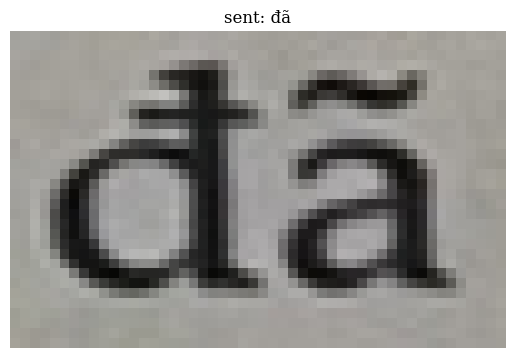

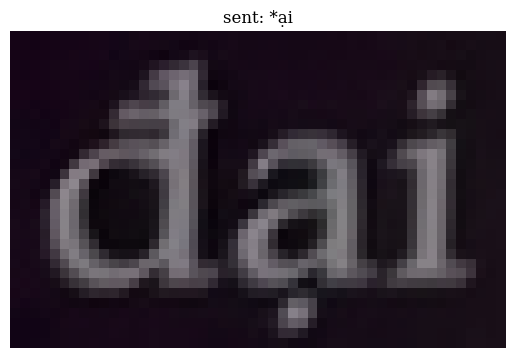

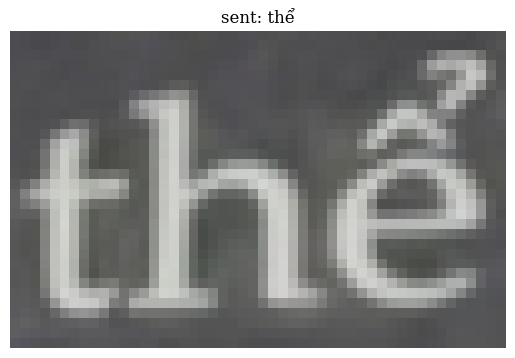

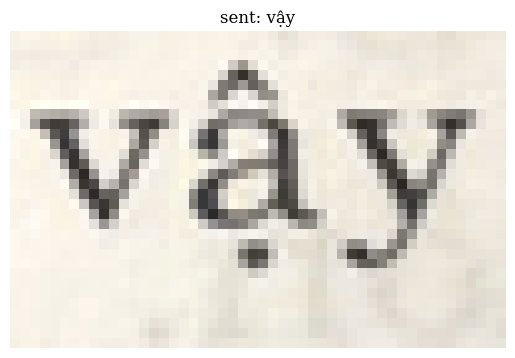

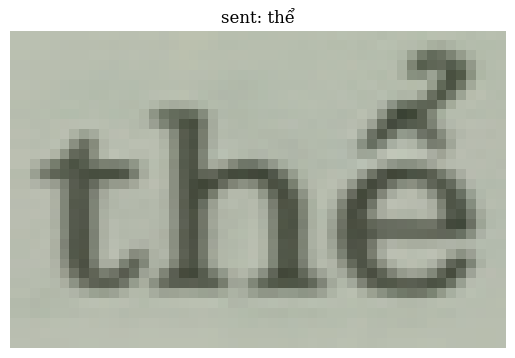

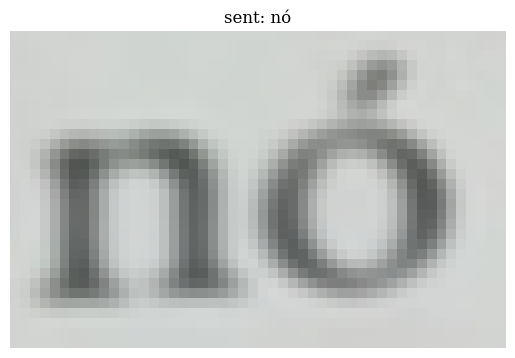

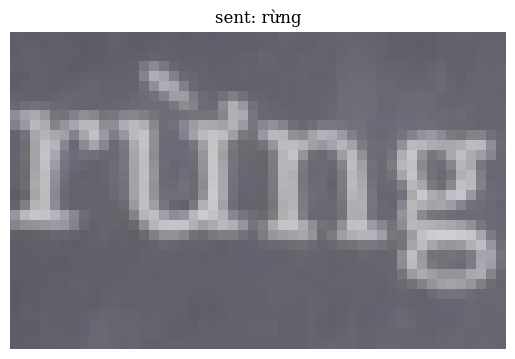

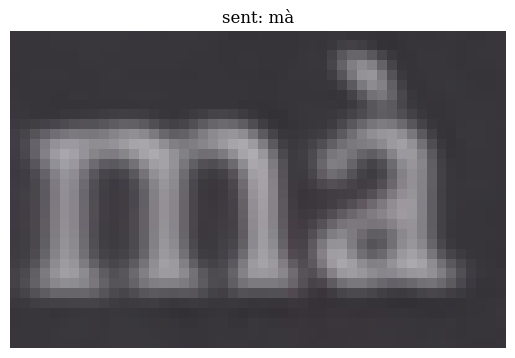

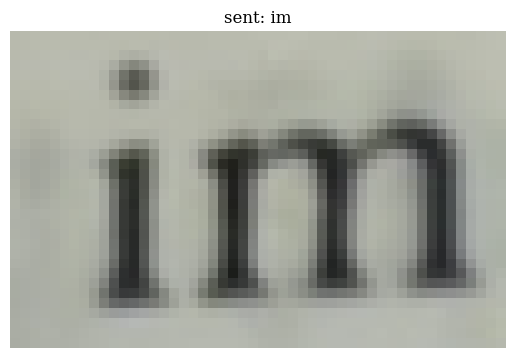

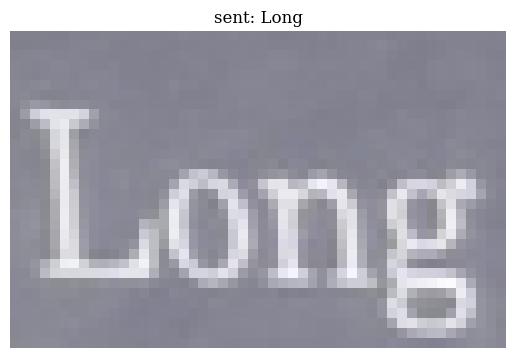

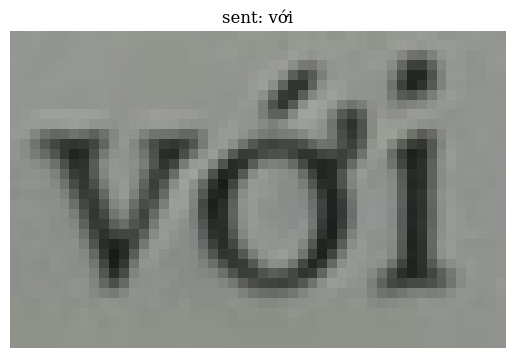

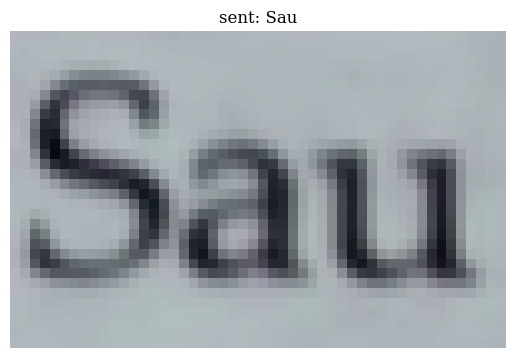

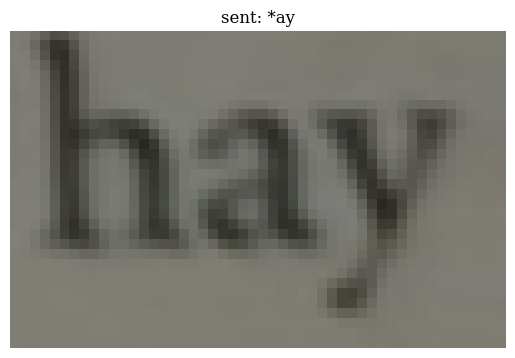

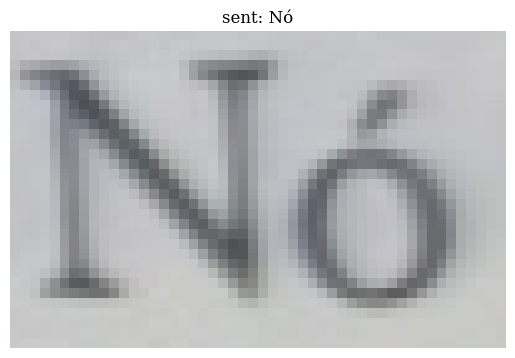

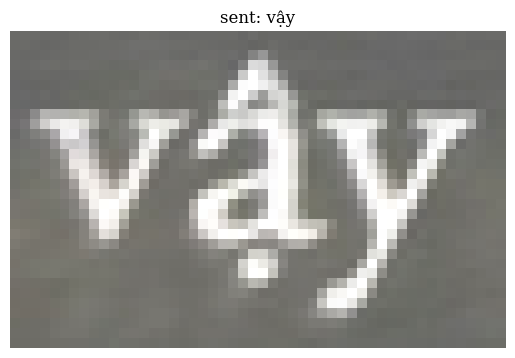

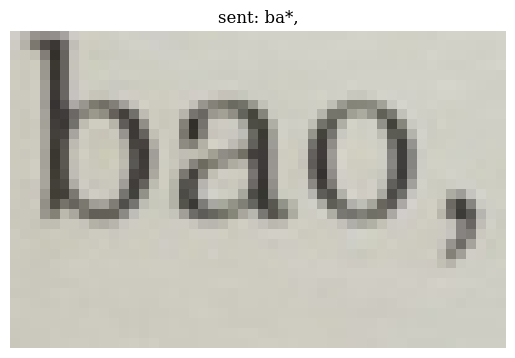

iter: 000200 - train loss: 0.663 - lr: 1.32e-04 - load time: 0.39 - gpu time: 21.20
iter: 000400 - train loss: 0.584 - lr: 3.72e-04 - load time: 0.61 - gpu time: 19.46
iter: 000600 - train loss: 0.574 - lr: 6.69e-04 - load time: 0.21 - gpu time: 18.60
iter: 000800 - train loss: 0.586 - lr: 9.09e-04 - load time: 0.67 - gpu time: 19.36
iter: 001000 - train loss: 0.589 - lr: 1.00e-03 - load time: 0.25 - gpu time: 19.56
iter: 001200 - train loss: 0.589 - lr: 9.99e-04 - load time: 0.59 - gpu time: 19.07
iter: 001400 - train loss: 0.587 - lr: 9.95e-04 - load time: 0.20 - gpu time: 18.43
iter: 001600 - train loss: 0.583 - lr: 9.89e-04 - load time: 0.68 - gpu time: 18.94
iter: 001800 - train loss: 0.576 - lr: 9.81e-04 - load time: 0.30 - gpu time: 19.41
iter: 002000 - train loss: 0.575 - lr: 9.70e-04 - load time: 0.51 - gpu time: 18.46
iter: 002200 - train loss: 0.577 - lr: 9.57e-04 - load time: 0.20 - gpu time: 19.13
iter: 002400 - train loss: 0.573 - lr: 9.41e-04 - load time: 0.57 - gpu time

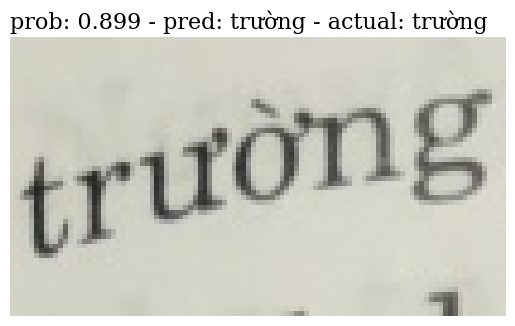

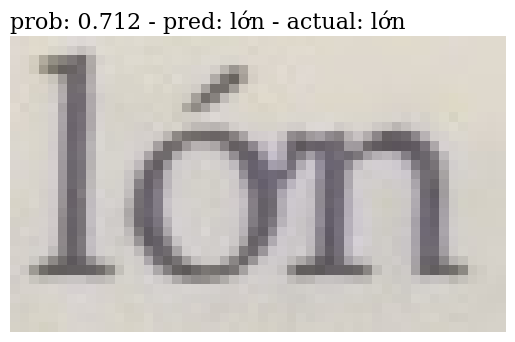

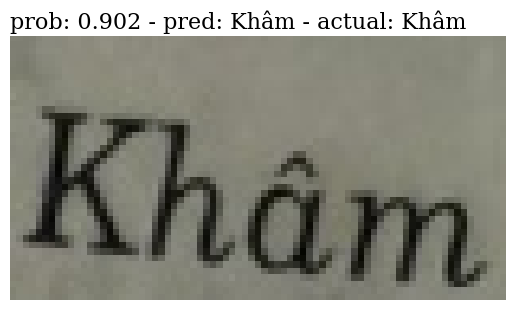

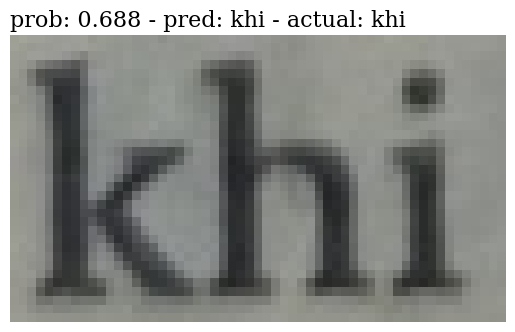

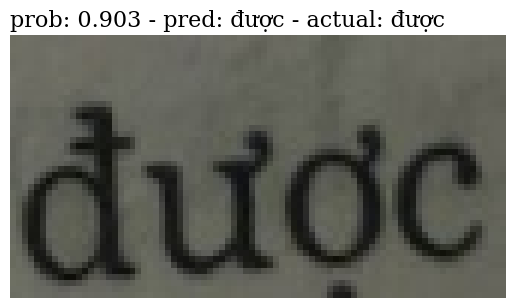

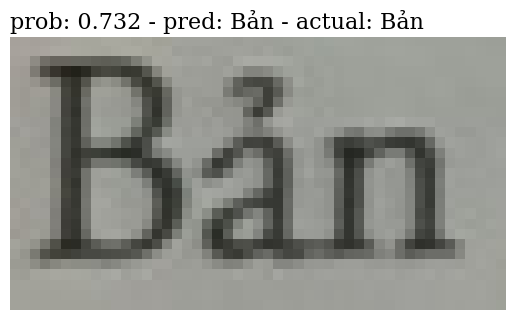

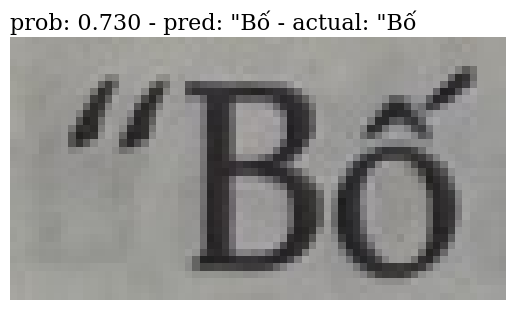

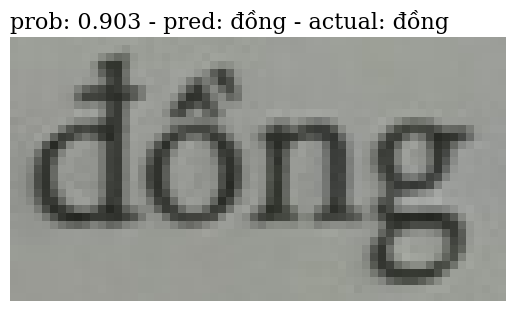

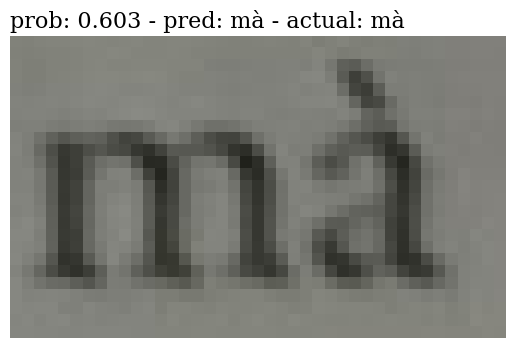

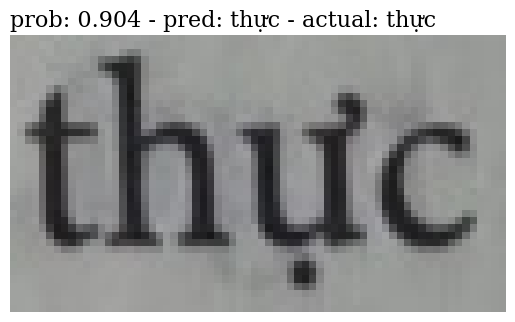

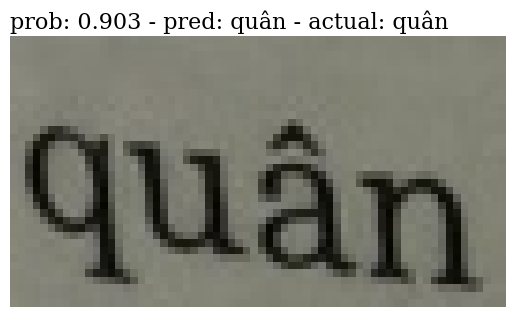

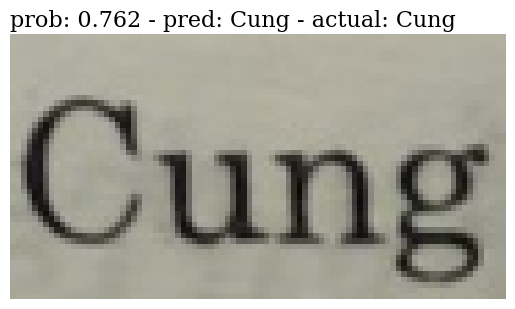

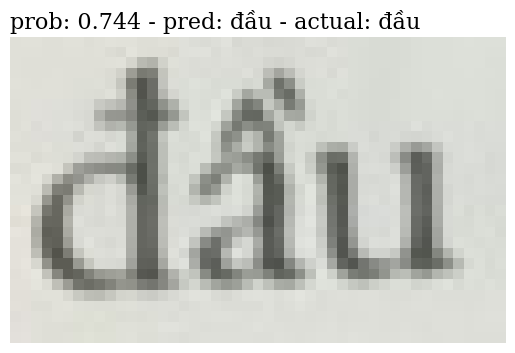

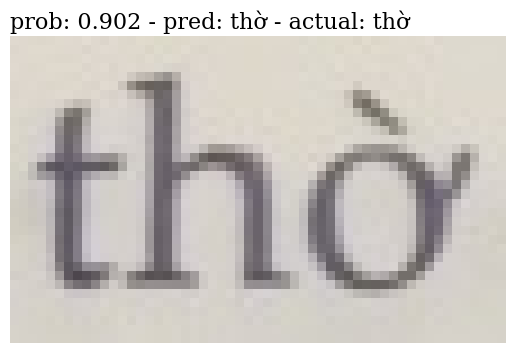

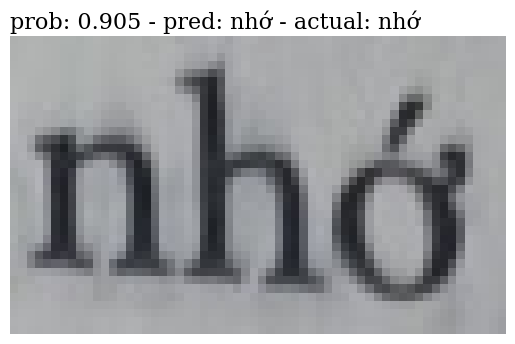

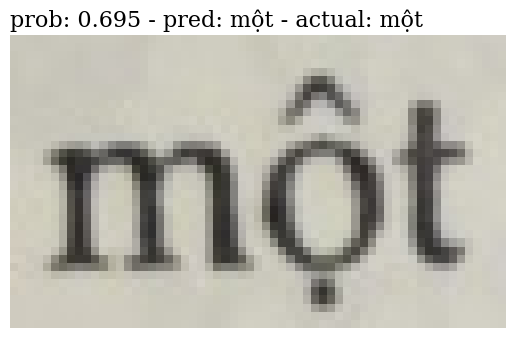

In [ ]:
# Các bạn có thể chọn vgg_transformer hoặc vgg_seq2seq
config = Cfg.load_config_from_name('vgg_seq2seq')

# Các bạn có thể thay đổi tập vocab của mình hoặc để mặc định vì tập vocab của mình đã tương đối đầy từ các kí tự rồi
# lưu ý rằng các kí tự không có trong tập vocab sẽ bị lỗi
#config['vocab'] = 'tập vocab'

dataset_params = {
    'name':'pbl_dataset', # tên dataset do bạn tự đặt
    'data_root':'data/', # thư mục chứa dữ liệu bao gồm ảnh và nhãn
    'train_annotation':'train_annotation.txt', # ảnh và nhãn tập train
    'valid_annotation':'valid_annotation.txt' # ảnh và nhãn tập test
}

params = {
         'print_every':200, # hiển thị loss mỗi 200 iteration
         'valid_every':5000, # đánh giá độ chính xác mô hình mỗi 10000 iteraction
          'iters':10000, # Huấn luyện 20000 lần
          'export':'./weights/myseq2seq.pth', # lưu model được huấn luyện tại này
          'metrics': 5000 # sử dụng 10000 ảnh của tập test để đánh giá mô hình
         }

# update custom config của các bạn
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0' # device để huấn luyện mô hình, để sử dụng cpu huấn luyện thì thay bằng 'cpu'
# config['device'] = 'cpu'

# huấn luyện mô hình từ pretrained model của mình sẽ nhanh hội tụ và cho kết quả tốt hơn khi bạn chỉ có bộ dataset nhỏ
# để sử dụng custom augmentation, các bạn có thể sử dụng Trainer(config, pretrained=True, augmentor=MyAugmentor()) theo ví dụ trên.
trainer = Trainer(config, pretrained=True)

# sử dụng lệnh này để visualize tập train, bao gồm cả augmentation
trainer.visualize_dataset()

# bắt đầu huấn luyện
trainer.train()

# visualize kết quả dự đoán của mô hình
trainer.visualize_prediction()

# huấn luyện xong thì nhớ lưu lại config để dùng cho Predictor
trainer.config.save('config.yml')

Predict

Predict:  được


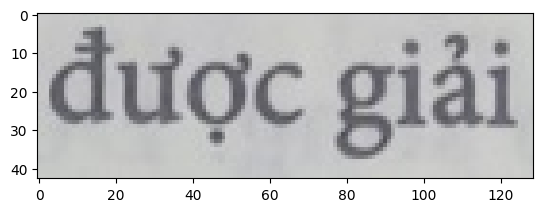

In [ ]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_file('config.yml') # sử dụng config của các bạn được export lúc train nếu đã thay đổi tham số
# config = Cfg.load_config_from_name('vgg_seq2seq') # sử dụng config mặc định của mình
config['weights'] = 'weights/myseq2seq.pth' # đường dẫn đến trọng số đã huấn luyện hoặc comment để sử dụng pretrained model của mình
config['device'] = 'cuda:0' # device chạy 'cuda:0', 'cuda:1', 'cpu'

detector = Predictor(config)

img = 'data/img/1_1_41.jpg'
# img = '1_1_33.jpg'
img = Image.open(img)
# dự đoán
s = detector.predict(img, return_prob=False) # muốn trả về xác suất của câu dự đoán thì đổi return_prob=True

print("Predict: ", s)
plt.imshow(img)
plt.show()